# Financial Services Use in Tanzania

The training dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey.

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.

# 1. Examining the dataset

In [2]:
# import basic data-science packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py 
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [3]:
# Open data file to read the first few lines
open('training.csv', 'r').readlines(5)

['"ID","Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8_1","Q8_2","Q8_3","Q8_4","Q8_5","Q8_6","Q8_7","Q8_8","Q8_9","Q8_10","Q8_11","Q9","Q10","Q11","Q12","Q13","Q14","Q15","Q16","Q17","Q18","Q19","Latitude","Longitude","mobile_money","savings","borrowing","insurance","mobile_money_classification"\n']

In [4]:
# Load dataset and explore
tanz_data = pd.read_csv('training.csv')

tanz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

The dataset appears to be a complete dataset. This will be verified in the next section.

In [110]:
# Checking for missing values
tanz_data.isnull().sum()


ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

Conclusion: our dataset has no missing observations. 

## 2. Descriptive statistics

In [111]:
# Basic descriptive statistics for the dataset
tanz_data.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


Summary Descriptive Statistics of the Dataset:

In summary the dataset is composed of 7094 entries. The ID column is an integer data type, the statistical variables of this column serve no purpose since the ID column is not used for numerical manipulation.

The rest of the dataset is made up of categorical variables and geospatial data, hence there is not much information that can be gleaned from the above descriptive statistics.

## 3. Graph Representation

In [5]:
# CLEAN DATASET

# Rename columns
tanz_data = tanz_data.rename(columns={'Q1':'age', 'Q2':'gender', 'Q3':'marital_status', 'Q6':'land_own', 'Q8_1':'wage_income'})
tanz_data = tanz_data.rename(columns={'Q8_2':'trade_income', 'Q8_3':'service_income', 'Q8_4':'piece_income', 'Q8_5':'rent_income', 'Q8_6':'interest_income'})
tanz_data = tanz_data.rename(columns={'Q8_7':'pension_income', 'Q8_8':'welfare_income', 'Q8_9':'dependant_income', 'Q8_10':'expansepaid_income', 'Q8_11':'other_income'})

# Encoding the mobile_money_classification column
tanz_data['mobile_money_classification'] = tanz_data['mobile_money_classification'].astype(str)
new_mm_classification = {'mobile_money_classification': {'0':'no_financial_services', '1':'other_only', '2':'mm_only', '3':'mm_plus'}}
tanz_data.replace(new_mm_classification, inplace=True)

Text(0, 0.5, 'AGE')

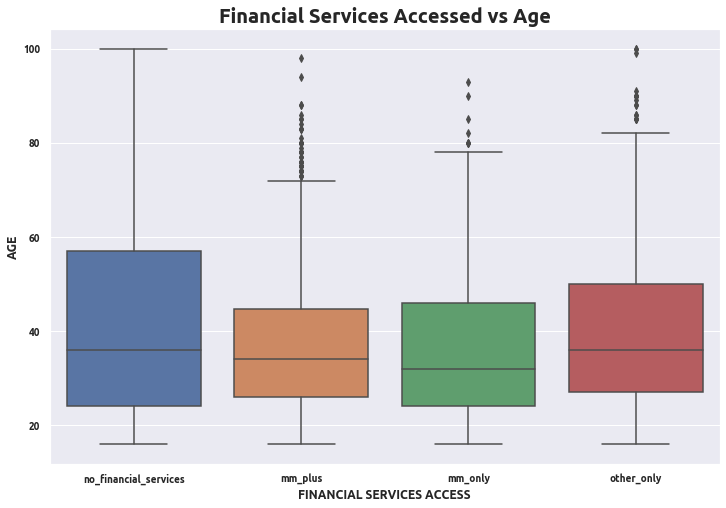

In [6]:
# create frequency tables to plot categorical variables
mmc_gender_table = pd.crosstab(index=tanz_data['mobile_money_classification'], 
                               columns=tanz_data['gender'])

mmc_marital_table = pd.crosstab(index=tanz_data['mobile_money_classification'], 
                               columns=tanz_data['marital_status'])

mmc_land_table = pd.crosstab(index=tanz_data['mobile_money_classification'], 
                               columns=tanz_data['land_own'])

# create frequency distribution tables
mmc_gender_table = (mmc_gender_table / mmc_gender_table.sum()) * 100
mmc_marital_table = (mmc_marital_table / mmc_marital_table.sum()) * 100
mmc_land_table = (mmc_land_table / mmc_land_table.sum()) * 100

# set graph style
sns.set()
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1)

# set graph styles
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)

plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

# plot the graphs
# graph 1
sns.boxplot(x='mobile_money_classification', y='age', data=tanz_data).set_title('Financial Services Accessed vs Age', fontsize=20, weight = 'bold')
plt.xlabel('FINANCIAL SERVICES ACCESS')
plt.ylabel('AGE')

The first boxplot is comparatively taller than all the other boxplots on the graph, this suggests that ages of individuals who do not use mobile money, do not save, do not have credit, and do not have insurance tend to vary more widely as compared to ages of individuals in the rest of the boxplots.

Its easy to notice that on average, the typical median age differs for indivduals classified in each category, however they all fall under the age of 40.
Finally, the first boxplot has no outliers, which means that this category has no data points that are statistically different from the rest of the data. The same cannot be said for rest of the other categories.

Description of The Categories:

No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance

Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)

Mm_only: Individuals who use mobile money only

Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)



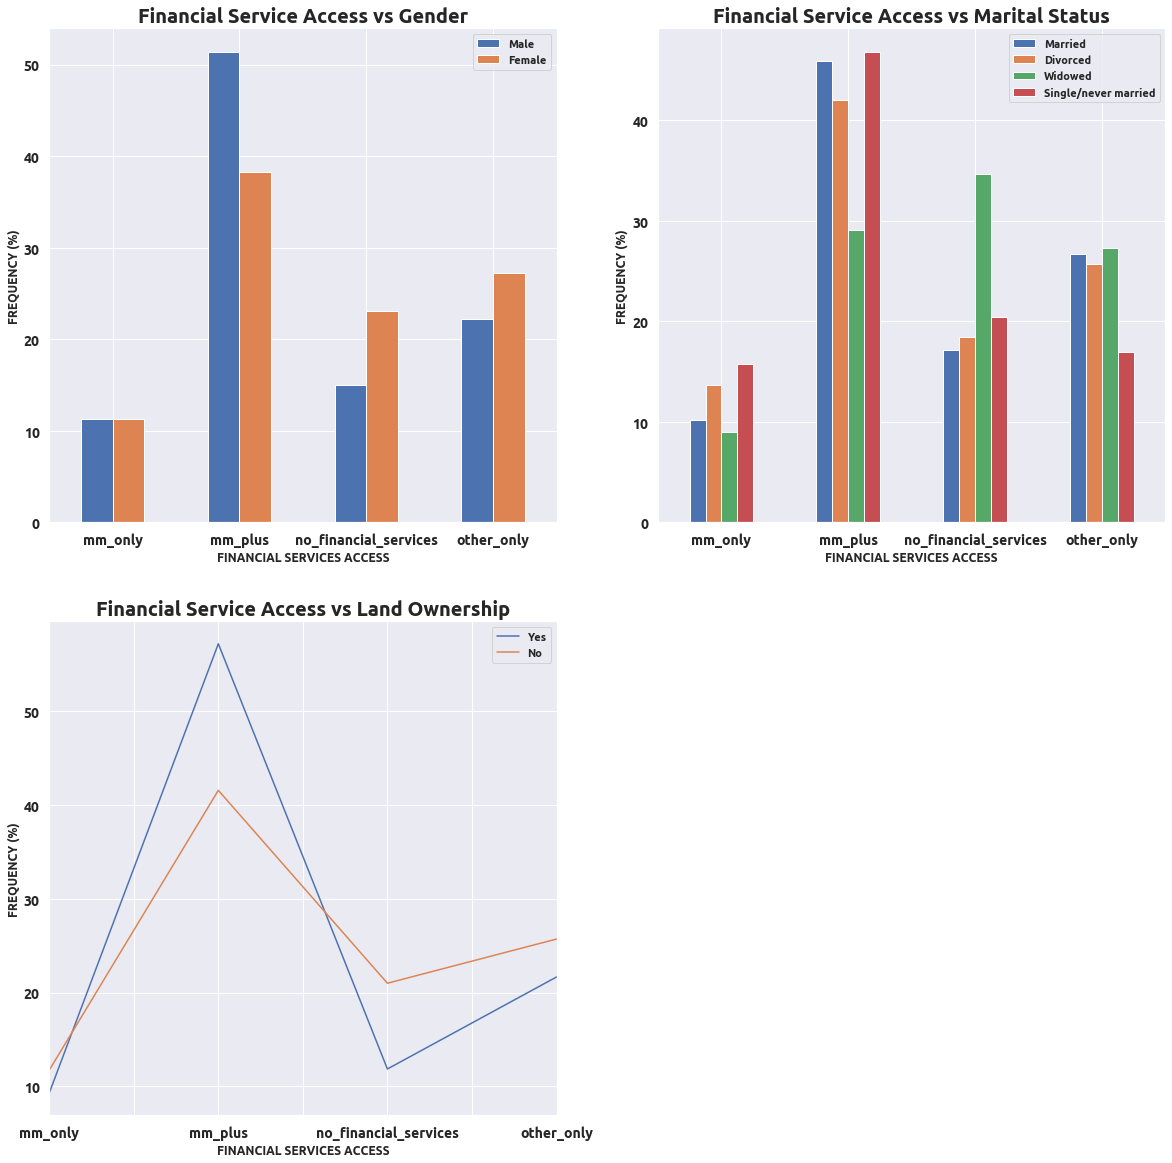

In [165]:
# graph 2
ax = plt.subplot(221)
mmc_gender_table.plot(kind='bar', stacked=False, ax=ax, figsize=(20,20)).set_title('Financial Service Access vs Gender', fontsize=20, weight = 'bold')
plt.xticks(fontsize=14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylabel('FREQUENCY (%)')
plt.xlabel('FINANCIAL SERVICES ACCESS')
plt.legend(('Male', 'Female'))

# graph 3
ax = plt.subplot(222)
mmc_marital_table.plot(kind='bar', stacked=False, ax=ax, figsize=(20,20)).set_title('Financial Service Access vs Marital Status', fontsize=20, weight = 'bold')
plt.xticks(fontsize=14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylabel('FREQUENCY (%)')
plt.xlabel('FINANCIAL SERVICES ACCESS')
plt.legend(('Married', 'Divorced', 'Widowed', 'Single/never married'))

# graph 4
ax = plt.subplot(223)
mmc_land_table.plot(kind='line', stacked=False, ax=ax, figsize=(20,20)).set_title('Financial Service Access vs Land Ownership', fontsize=20, weight = 'bold')
plt.xticks(fontsize=14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylabel('FREQUENCY (%)')
plt.xlabel('FINANCIAL SERVICES ACCESS')
plt.legend(('Yes', 'No'))


Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance) are statistically more represented in all of the above graphs.

More specifically, males, single people and land owners are likely to use mobile money and at least one of the other financial services (savings, credit, insurance).

### Financial Services Accessed vs Income Types

In [169]:
income_type = tanz_data.groupby('mobile_money_classification').aggregate({'wage_income': 'count',
                                                               'trade_income': 'count',
                                                               'service_income': 'count',
                                                               'piece_income': 'count',
                                                               'rent_income': 'count',
                                                               'interest_income': 'count',
                                                               'pension_income': 'count',
                                                               'welfare_income': 'count',
                                                               'dependant_income': 'count',
                                                               'expansepaid_income': 'count',
                                                               'other_income': 'count'})
income_type = (income_type / income_type.sum()) * 100

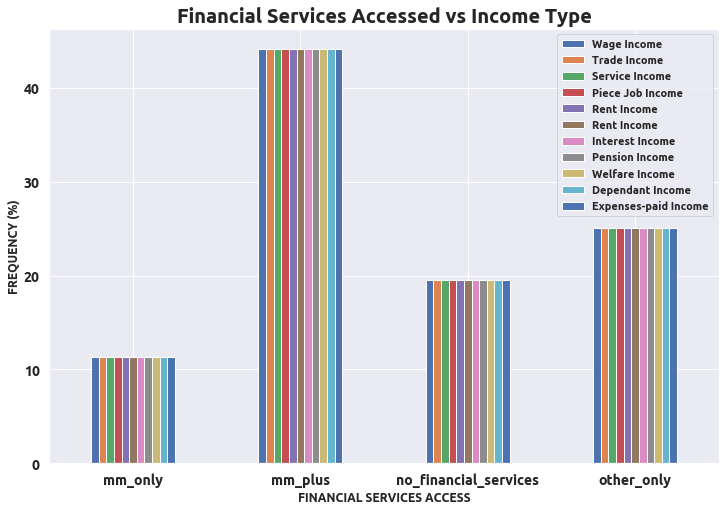

In [170]:
income_type.plot(kind='bar').set_title('Financial Services Accessed vs Income Type', fontsize=20, weight = 'bold')

plt.xticks(fontsize=14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylabel('FREQUENCY (%)')
plt.xlabel('FINANCIAL SERVICES ACCESS')
plt.legend(('Wage Income', 'Trade Income', 'Service Income', 'Piece Job Income', 
            'Rent Income', 'Rent Income', 'Interest Income', 'Pension Income', 
            'Welfare Income', 'Dependant Income', 'Expenses-paid Income', 'Other Income'))

More than 40 percent of people with the listed income types fall in the category of individuals who Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance) are statistically more represented in all of the above graphs.

And about 25 percent of all income types account for individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance).

# 4. Graph Representation: Pt. 2

In [8]:


# Rename column header
tanz_data = tanz_data.rename(columns={'Q16':'mobile_money_usage'})

# Encoding the mobile_money_usage column
tanz_data['mobile_money_usage'] = tanz_data['mobile_money_usage'].astype(str)
new_mm_classification = {'mobile_money_usage': {'-1':'no_applicable', '1':'never', '2':'daily', '3':'weekly', '4':'monthly', '5':'less_than_monthly'}}
tanz_data.replace(new_mm_classification, inplace=True)



## Frequency of Mobile Usage vs Age

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

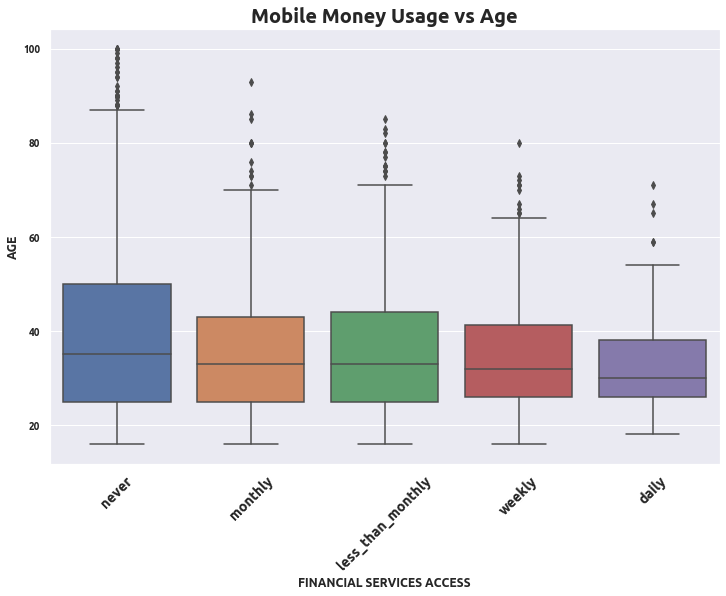

In [9]:
# create frequency tables to plot categorical variables
mmu_gender_table = pd.crosstab(index=tanz_data['mobile_money_usage'], 
                               columns=tanz_data['gender'])

mmu_marital_table = pd.crosstab(index=tanz_data['mobile_money_usage'], 
                               columns=tanz_data['marital_status'])

mmu_land_table = pd.crosstab(index=tanz_data['mobile_money_usage'], 
                               columns=tanz_data['land_own'])

# create frequency distribution tables
mmu_gender_table = (mmu_gender_table / mmu_gender_table.sum()) * 100
mmu_marital_table = (mmu_marital_table / mmu_marital_table.sum()) * 100
mmu_land_table = (mmu_land_table / mmu_land_table.sum()) * 100

# plot the graphs
# graph 1
sns.boxplot(x='mobile_money_usage', y='age', data=tanz_data).set_title('Mobile Money Usage vs Age', fontsize=20, weight = 'bold')
plt.xlabel('FINANCIAL SERVICES ACCESS')
plt.ylabel('AGE')
plt.xticks(fontsize=14, rotation = 45)

The first boxplot is comparatively taller than all the other boxplots on the graph, this suggests that ages of individuals who never use mobile money tend to vary more widely as compared to ages of individuals who use mobile money daily and weekly.

Its easy to notice that on average, the typical median age differs for indivduals classified in each category except the category of individuals who use mobile money monthly and less than monthly, however the median age in all categories falls under 40.
Finally, all categories have outliers and all categories are highly skewed except for the daily category which is slightly more symmetrical.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

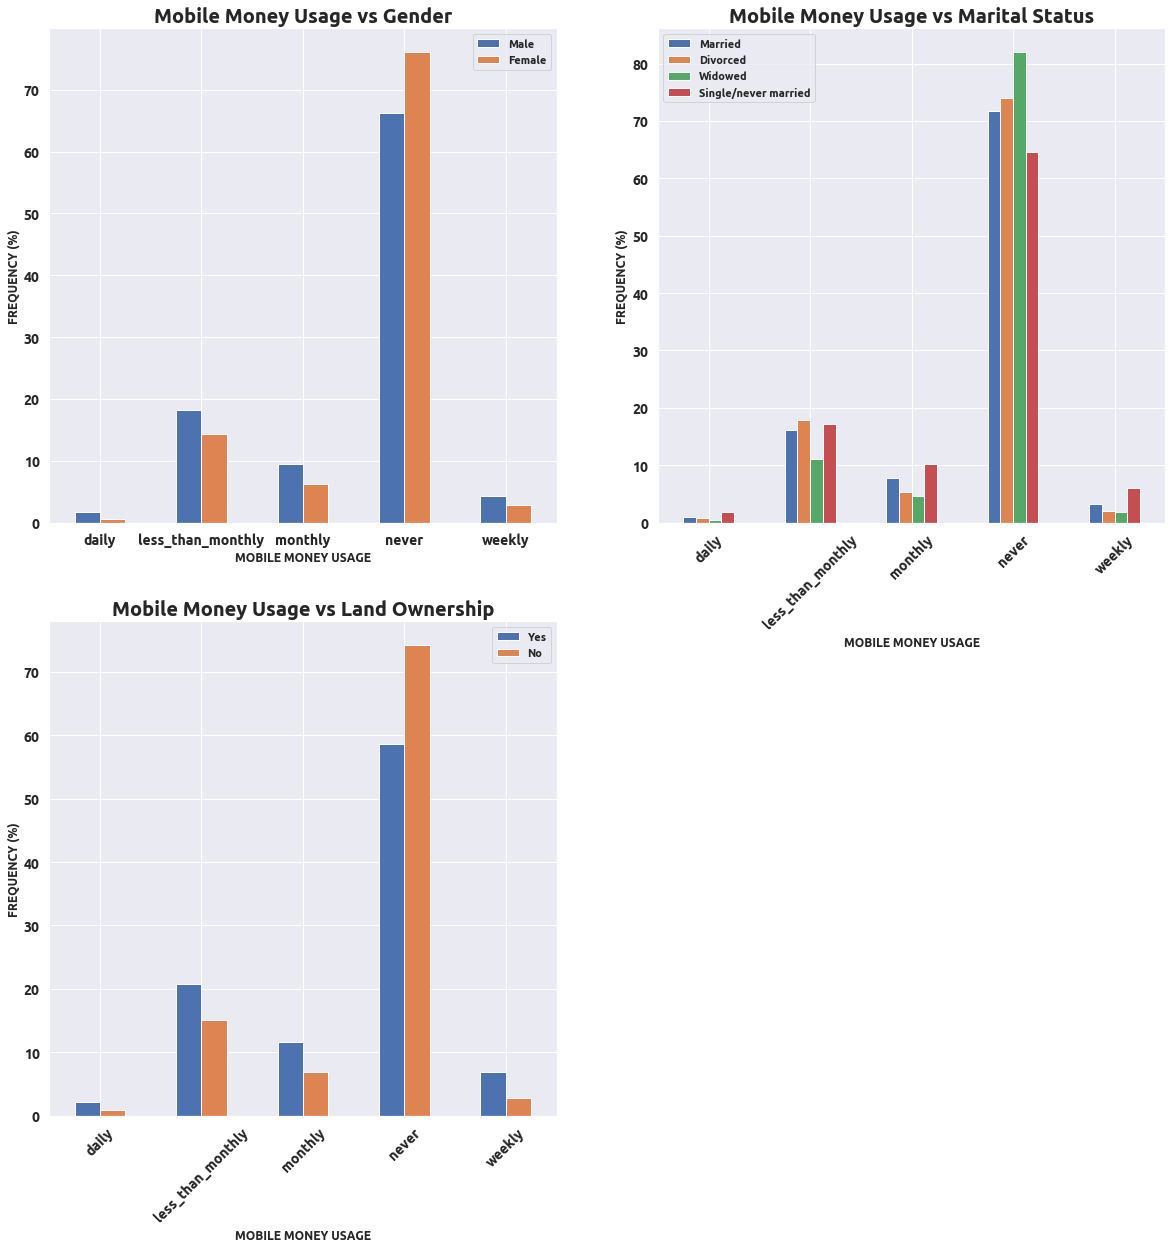

In [10]:
# graph 2
ax = plt.subplot(221)
mmu_gender_table.plot(kind='bar', stacked=False, ax=ax, figsize=(20,20)).set_title('Mobile Money Usage vs Gender', fontsize=20, weight = 'bold')
plt.xticks(fontsize=14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylabel('FREQUENCY (%)')
plt.xlabel('MOBILE MONEY USAGE')
plt.legend(('Male', 'Female'))
plt.xticks(fontsize=14, rotation = 0)

# graph 3
ax = plt.subplot(222)
mmu_marital_table.plot(kind='bar', stacked=False, ax=ax, figsize=(20,20)).set_title('Mobile Money Usage vs Marital Status', fontsize=20, weight = 'bold')
plt.xticks(fontsize=14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylabel('FREQUENCY (%)')
plt.xlabel('MOBILE MONEY USAGE')
plt.legend(('Married', 'Divorced', 'Widowed', 'Single/never married'))
plt.xticks(fontsize=14, rotation = 45)

# graph 4
ax = plt.subplot(223)
mmu_land_table.plot(kind='bar', stacked=False, ax=ax, figsize=(20,20)).set_title('Mobile Money Usage vs Land Ownership', fontsize=20, weight = 'bold')
plt.xticks(fontsize=14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylabel('FREQUENCY (%)')
plt.xlabel('MOBILE MONEY USAGE')
plt.legend(('Yes', 'No'))
plt.xticks(fontsize=14, rotation = 45)

Individuals who never use mobile money are statistically more represented in all of the above graphs.

More specifically, females, widows and non land owners are likely to never use mobile money.


In [11]:
income_type = tanz_data.groupby('mobile_money_usage').aggregate({'wage_income': 'count',
                                                               'trade_income': 'count',
                                                               'service_income': 'count',
                                                               'piece_income': 'count',
                                                               'rent_income': 'count',
                                                               'interest_income': 'count',
                                                               'pension_income': 'count',
                                                               'welfare_income': 'count',
                                                               'dependant_income': 'count',
                                                               'expansepaid_income': 'count',
                                                               'other_income': 'count'})
income_type = (income_type / income_type.sum()) * 100

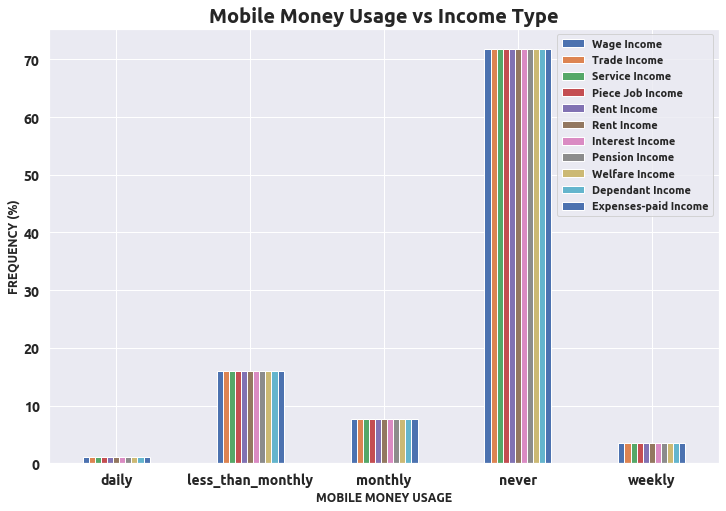

In [12]:
income_type.plot(kind='bar').set_title('Mobile Money Usage vs Income Type', fontsize=20, weight = 'bold')

plt.xticks(fontsize=14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylabel('FREQUENCY (%)')
plt.xlabel('MOBILE MONEY USAGE')
plt.legend(('Wage Income', 'Trade Income', 'Service Income', 'Piece Job Income', 
            'Rent Income', 'Rent Income', 'Interest Income', 'Pension Income', 
            'Welfare Income', 'Dependant Income', 'Expenses-paid Income', 'Other Income'))

Slightly more than 70 percent of all income types account for individuals who never use mobile money. The rest of the data shows how often other individuals use mobile money.

In [171]:
# plot the map
data = go.Scattergeo(
        lon = tanz_data['Longitude'],
        lat = tanz_data['Latitude'],
        text = [tanz_data['wage_income'], tanz_data['trade_income'],
                    tanz_data['service_income'], tanz_data['piece_income'],
                   tanz_data['rent_income'], tanz_data['interest_income'],
                   tanz_data['welfare_income'], tanz_data['dependant_income'],
                   tanz_data['expansepaid_income'], tanz_data['other_income']],
        mode = 'markers',
        marker = dict(symbol = 'star', size=5, colorscale = 'Blues'),
        marker_color = tanz_data['mobile_money']
)
layout = dict(title = 'Mobile Services Coverage Tanzania',
             geo_scope = 'africa', 
            )
choromap = go.Figure(data = [data], layout = layout)

iplot(choromap)


There seems to be a fairly wide distribution of mobile service coverage with respect to type of income throughout the country.

Demographic and Geographic Factors associated with mobile money use in Tanzania:

1) The  median age is under 40 years

2) Males account for a higher representation

3) Single people account for a higher representation

4) Land owners account for a higher representation

5) Mobile Services Coverage is widely represented throughout the country